### Ch.18 Model 개선하기

### Reuters

In [ ]:
from keras.datasets import reuters

from keras.preprocessing import sequence
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=100))
model.add(LSTM(100, activation="tanh"))
model.add(Dense(46, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=100, epochs=20)

In [ ]:
print("Validationn Accuracy: %.4f" % model.evaluate(x_test, y_test)[1])

In [ ]:
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Valtestset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trianset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
# 0.7146

### IMDB

In [151]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import BatchNormalization, Embedding, Dropout, Conv1D, MaxPool1D, LSTM, Dense, Activation

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [153]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [154]:
early_stopping = EarlyStopping(monitor="val_loss", patience=15)

In [155]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [156]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 100)         500000    
_________________________________________________________________
dropout_29 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 55)                26400     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1792      
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [157]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [158]:
history = model.fit(x_train, Y_train, validation_split=0.2, batch_size=500, epochs=30, callbacks=[early_stopping])

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 99s 5ms/step - loss: 0.6270 - accuracy: 0.6499 - val_loss: 0.4581 - val_accuracy: 0.7986
Epoch 2/30
20000/20000 [==============================] - 92s 5ms/step - loss: 0.3716 - accuracy: 0.8377 - val_loss: 0.3585 - val_accuracy: 0.8386
Epoch 3/30
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2876 - accuracy: 0.8839 - val_loss: 0.3557 - val_accuracy: 0.8460
Epoch 4/30
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2510 - accuracy: 0.9017 - val_loss: 0.3446 - val_accuracy: 0.8472
Epoch 5/30
20000/20000 [==============================] - 89s 4ms/step - loss: 0.2280 - accuracy: 0.9095 - val_loss: 0.3685 - val_accuracy: 0.8442
Epoch 6/30
20000/20000 [==============================] - 89s 4ms/step - loss: 0.2089 - accuracy: 0.9207 - val_loss: 0.3689 - val_accuracy: 0.8434
Epoch 7/30
20000/20000 [==============================] - 89s 4ms/ste

In [159]:
print("Valest Accuracy: %.4f" % model.evaluate(x_train, Y_train)[1])
print("Testest Accuracy: %.4f" % model.evaluate(x_test, Y_test)[1])

25000/25000 [==============================] - 50s 2ms/step
Valest Accuracy: 0.9635
25000/25000 [==============================] - 50s 2ms/step
Testest Accuracy: 0.8287


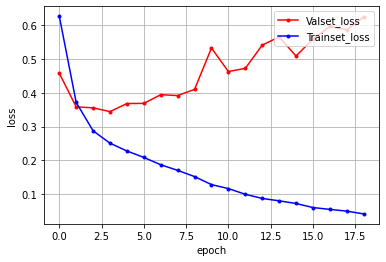

In [160]:
y_loss = history.history["loss"]
y_vloss = history.history["val_loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Valset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

- 0.9597 (0.8334)
- Embedding(5000, 100) -> Dropout(0.5) -> Conv1D(64, 5, "relu") -> MaxPool1D(4) -> LSTM(55) -> Dense(1, "sigmoid")
<!-- model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, kernel_size=5, padding="valid", activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation("sigmoid")) -->



- 0.9352 (0.7907)
- Embedding(5000, 100) -> Dropout(0.5) -> Conv1D(128, 5, "relu") -> Conv1D(64, 5, "relu") -> MaxPool1D(4) -> Dropout(0.5) -> Conv1D(128, 5, "relu") -> Conv1D(64, 5, "relu") -> MaxPool1D(4) -> Dropout(0.5) -> LSTM(55) -> Dense(1, "sigmoid")
<!-- model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(128, kernel_size=5, activation="relu"))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(Dropout(0.5))
model.add(Conv1D(128, kernel_size=5, activation="relu"))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(Dropout(0.5))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation("sigmoid")) -->



- 0.7368 (0.6684)
<!-- model = Sequential()
model.add(Embedding(5000, 100))
model.add(Conv1D(128, kernel_size=5, activation="relu"))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dense(32))
model.add(Dense(1))
model.add(Activation("sigmoid")) -->



- 0.8254 (0.7171)
<!-- model = Sequential()
model.add(Embedding(5000, 100))
model.add(Conv1D(128, kernel_size=5, activation="relu"))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dense(32))
model.add(Dense(1))
model.add(Activation("sigmoid")) -->



- 0.9428 (0.7799)
<!-- model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(128, kernel_size=5, activation="relu"))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(Dropout(0.5))
model.add(Conv1D(64, kernel_size=5, activation="relu"))
model.add(Conv1D(32, kernel_size=5, activation="relu"))
model.add(MaxPool1D(pool_size=4))
model.add(Dropout(0.5))
model.add(LSTM(55))
model.add(Dense(32))
model.add(Dense(1))
model.add(Activation("sigmoid")) -->